# Pytorch

* Python wrapper and framework for scinetific computing based on torch
* Open source and supported by facebook
* Alternative to TensorFlow and/or Keras
* Comparison to TensorFlow:
  * https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/
  * https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=tensorflow,pytorch
  * https://pytorch.org/get-started/locally/

In [1]:
import torch               as tr
import torch.nn            as nn
import torch.nn.functional as F
from   torch.nn         import Linear, Embedding
from   torch.nn         import LSTM, GRU, Transformer
from   torch.nn import TransformerEncoderLayer,  TransformerDecoderLayer
from   torch.nn import TransformerEncoder,  TransformerDecoder, LayerNorm
from   torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt

import math

lr = 0.001
bs = 16
device = "cpu"

## Basic Torch

* We build a basic linear model
* We use autograd (part of pytorch)

In [2]:
# Fake data
x = tr.randn(1000)
y = 10 * x + 5

In [3]:
# Initialise params
a = tr.tensor(0., requires_grad=True)
b = tr.tensor(0., requires_grad=True)

In [4]:
# Calc output and loss
o = x * a + b # Model
l = (y - o).pow(2).mean()
l

tensor(123.9047, grad_fn=<MeanBackward0>)

### Now let's iterate and use backpropagation

In [5]:
for i in range(1000):
    # Calc output
    o = x * a + b # Forward pass
    
    # Calc loss
    l = (y - o).pow(2).mean()
    
    # Calc gradients
    l.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with tr.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None

    if i % 100 == 0:
        print("params:", a.item(), b.item(), "loss:", l.item())

params: 0.020333779975771904 0.008894313126802444 loss: 123.90465545654297
params: 1.8576717376708984 0.8240893483161926 loss: 83.24549102783203
params: 3.355804443359375 1.5080108642578125 loss: 55.95270538330078
params: 4.5775275230407715 2.0814075469970703 loss: 37.62394714355469
params: 5.573982238769531 2.561831474304199 loss: 25.309629440307617
params: 6.386819362640381 2.964111089706421 loss: 17.032608032226562
params: 7.049968719482422 3.3007633686065674 loss: 11.466886520385742
params: 7.591072082519531 3.582339286804199 loss: 7.722801685333252
params: 8.032655715942383 3.8177287578582764 loss: 5.203111171722412
params: 8.39306926727295 4.01440954208374 loss: 3.506774425506592


## Simplify further

* Using optim submodule
* And then prebuilt losses

In [6]:
# Initialise params
a = tr.tensor(0., requires_grad=True)
b = tr.tensor(0., requires_grad=True)

In [7]:
loss_fn = nn.MSELoss(reduction="mean")

In [8]:
for i in range(1000):
    # Calc output
    o = x * a + b
    
    # Calc loss
    l = loss_fn(y, o)
    
    # Calc gradient
    l.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with tr.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None

    if i % 100 == 0:
        print("params:", a.item(), b.item(), "loss:", l.item())

params: 0.020333779975771904 0.008894313126802444 loss: 123.90465545654297
params: 1.8576717376708984 0.8240893483161926 loss: 83.24549102783203
params: 3.355804443359375 1.5080108642578125 loss: 55.95270538330078
params: 4.5775275230407715 2.0814075469970703 loss: 37.62394714355469
params: 5.573982238769531 2.561831474304199 loss: 25.309629440307617
params: 6.386819362640381 2.964111089706421 loss: 17.032608032226562
params: 7.049968719482422 3.3007633686065674 loss: 11.466886520385742
params: 7.591072082519531 3.582339286804199 loss: 7.722801685333252
params: 8.032655715942383 3.8177287578582764 loss: 5.203111171722412
params: 8.39306926727295 4.01440954208374 loss: 3.506774425506592


In [9]:
# Initialise params
a = tr.tensor(0., requires_grad=True)
b = tr.tensor(0., requires_grad=True)

# Create the optimiser
optimizer = tr.optim.RMSprop([a, b], lr=lr)

In [10]:
for i in range(10000):
    # Calc output (forward pass)
    o = x * a + b
    
    # Calc loss
    l = loss_fn(o, y)
    
    # Zero grad
    optimizer.zero_grad()
    
    # Calc gradient
    l.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    optimizer.step()

    if i % 1000 == 0:
        print("params:", a.item(), b.item(), "loss:", l.item())

params: 0.010000000707805157 0.009999999776482582 loss: 123.90465545654297
params: 1.1153604984283447 1.1027530431747437 loss: 93.82075500488281
params: 2.1041107177734375 2.0722572803497314 loss: 71.14530944824219
params: 3.0914244651794434 3.0287210941314697 loss: 52.24142837524414
params: 4.076870918273926 3.95320725440979 loss: 37.06230545043945
params: 5.0597028732299805 4.694555282592773 loss: 25.42506217956543
params: 6.038167476654053 4.780937671661377 loss: 16.352022171020508
params: 7.010662078857422 4.835211753845215 loss: 9.311007499694824
params: 7.972927093505859 4.8884077072143555 loss: 4.282654285430908
params: 8.913073539733887 4.940384387969971 loss: 1.2322534322738647


## Neural Networks (Models)

In [11]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        
        self.linear = Linear(1, 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y

In [12]:
model = NN()
optimizer = tr.optim.Adam(model.parameters(), lr=lr)

In [13]:
for i in range(10000):
    # Calc output (forward pass)
    o = model(x.view(-1, 1))
    
    # Calc loss
    l = loss_fn(o, y.view(-1, 1))
    
    # Zero grad
    optimizer.zero_grad()
    
    # Calc gradient
    l.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    optimizer.step()

    if i % 1000 == 0:
        print("params:", [p.item() for p in model.parameters()], "loss:", l.item())

params: [-0.4044952988624573, 0.18743284046649933] loss: 130.70654296875
params: [0.5750799179077148, 1.1373134851455688] loss: 103.68655395507812
params: [1.5197066068649292, 1.9944278001785278] loss: 81.33903503417969
params: [2.438163995742798, 2.766343593597412] loss: 62.854679107666016
params: [3.3357338905334473, 3.446805238723755] loss: 47.66291809082031
params: [4.214394569396973, 4.014077186584473] loss: 35.309547424316406
params: [5.073246955871582, 4.433699607849121] loss: 25.370012283325195
params: [5.908753395080566, 4.681946277618408] loss: 17.44463348388672
params: [6.714770793914795, 4.794194221496582] loss: 11.244179725646973
params: [7.482138156890869, 4.851014137268066] loss: 6.60529088973999


## Attention

* First we had:
  * CNN for images
  * RNNs for text and time series and sound
  * Dense for everything else
* Second we added attention to these architectures
* Third Transformer Models
* https://www.youtube.com/watch?v=FC8PziPmxnQ&ab_channel=ShusenWang

Lets look at the images https://towardsdatascience.com/how-to-code-the-transformer-in-pytorch-24db27c8f9ec

In [14]:
class Attention(nn.Module):
    def __init__(self, heads, hidden, dropout=0.1):
        super(Attention, self).__init__()

        self.hidden = hidden
        self.head   = hidden // heads
        self.heads  = heads

        self.v = Linear(hidden, hidden)
        self.k = Linear(hidden, hidden)
        self.q = Linear(hidden, hidden)
        self.o = Linear(hidden, hidden)
        
        self.dropout = Dropout(dropout)
    
    def attention(self, q, k, v, mask=None):
        # input dim: (bs, heads, seq, head)
        # output dim: (bs, heads, seq, seq)
        # Dot product each query with each key (each head separately)
        scores = tr.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.head)

        # Apply mask
        if mask is not None:
            mask   = mask.unsqueeze(1)
            scores = scores.masked_fill(mask == 0, -1e9)

        # Make the results distributions
        # Does not change dimentions
        scores = F.softmax(scores, dim=-1)

        # Dropout (does not change dimentions)
        ascores = self.dropout(scores)

        # Multiply the distributions with the values
        # input dim: (bs, heads, seq, seq)
        # output dim: (bs, heads, seq, head)
        output = tr.matmul(scores, v)
        
        return output
    
    def forward(self, input, q, k, v, mask=None):
        # Get batch size
        bs = q.shape[0]
        
        # Pass the input through the linear layers and split heads
        q = self.q(q).view(bs, -1, self.heads, self.head)
        k = self.k(k).view(bs, -1, self.heads, self.head)
        v = self.v(v).view(bs, -1, self.heads, self.head)
        
        # transpose to get dimensions bs * h * sl * d_model
        k = k.transpose(1,2)
        q = q.transpose(1,2)
        v = v.transpose(1,2)

        # calculate attention using function we will define next
        scores = self.attention(q, k, v, mask)

        # concatenate heads and put through final linear layer
        concat = scores.transpose(1,2) \
                       .contiguous() \
                       .view(bs, -1, self.hidden)

        output = self.out(concat)

        return output

# Transformers
* Replace need for recurrent and even CNNs I think. A newer deep architecture which uses self attention
* Works on sequence data (there are image transformers now)
* Comprises of Encoders and Decoders
* Allegedly beats pure LSTM encoder/decoder architechture and are more efficient to train
* BERT is an example
* Introduced in 2017 by google and BERT is based on it
* Sentiment analysis, questin answering, language modeling, language generation
https://pytorch.org/tutorials/beginner/transformer_tutorial.html

In [15]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_len=5000):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        
        pe = tr.zeros(max_seq_len, d_model)
        
        for pos in range(max_seq_len):
            for i in range(0, d_model, 2):
                pe[pos, i] = \
                    math.sin(pos / (10000 ** ((2 * i) / d_model)))
                pe[pos, i + 1] = \
                    math.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))
        pe = pe.unsqueeze(0).transpose(0,1 )
        self.register_buffer('pe', pe)

    def forward(self, x):
        with tr.no_grad():
            seq = x.size(0)
            bs = x.size(1)
            pe = self.pe[:seq, :]
            x = x + pe
            return x
    
# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

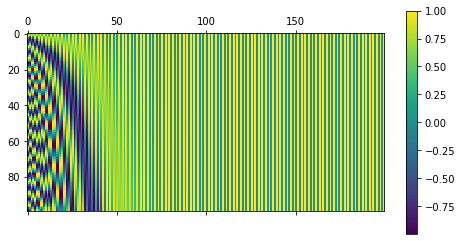

In [16]:
pe = PositionalEncoding(200)
cax = plt.matshow(pe.pe.view(5000, 200)[:100, :500])
plt.gcf().colorbar(cax)
pass